In [2]:
import matplotlib.pyplot as plt
import itertools as it
import networkx as nx
from networkx.generators.atlas import graph_atlas_g
from networkx.algorithms import isomorphism
from sympy.combinatorics.permutations import Permutation
from sympy.combinatorics.perm_groups import PermutationGroup
from math import factorial

from time import time

from functools import reduce
fib = lambda n:reduce(lambda x,n:[x[1],x[0]+x[1]], range(n),[0,1])[0]
fibs = lambda i:2*fib(i)

In [3]:
# Creamos la familia de gráficas:
def getMaxdegree(G): # Regresa un vértice de grado máximo.
  dic = dict(G.degree())
  return max(dic, key=dic.get)

def Treebonacci(n): # Genera los primeros n>3 árboles de Fibonacci.
  t0 = time()
  T = []
  T.append(nx.empty_graph())
  T.append(nx.path_graph(2))
  T.append(nx.path_graph(2))

  for i in range(3,n):
    a = getMaxdegree(T[i-1])
    b = getMaxdegree(T[i-2]) + len(T[i-1].nodes())
    Ti = nx.disjoint_union(T[i-1],T[i-2])
    Ti.add_edge(a,b)
    T.append(Ti)
  print("Tiempo para generar árboles:",time()-t0)
  return T

def Treebonacci_group(n): # Intenta generar los primeros n>3 grupos de árboles de Fibonacci.
  t0 = time()
  P = []
  P.append(Permutation(0))
  P.append(Permutation(0,1))
  P.append(Permutation(0,1))
  P.append(Permutation(8,9))
  P.append(Permutation(2,5))
  P.append(Permutation(7,9)(8,10))

  for i in range(6,n):
    ti2 = 2*fib(i-1)
    Pi = Permutation([(j,j + ti2) for j in range(ti2)])
    P.append(Pi)
  print("Tiempo para generadores:",time()-t0)
  return P

Tiempo para generar árboles: 0.0073795318603515625


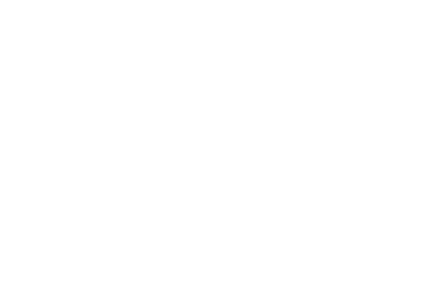

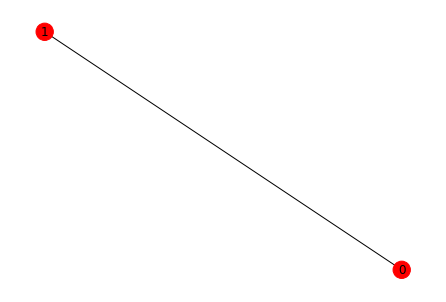

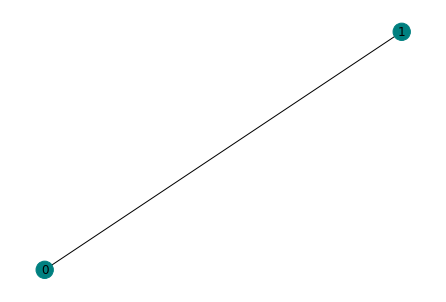

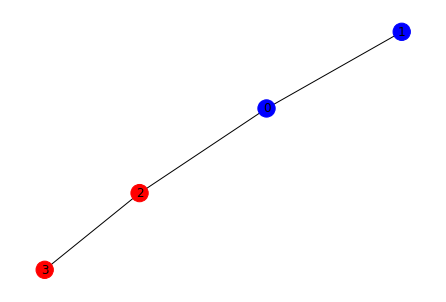

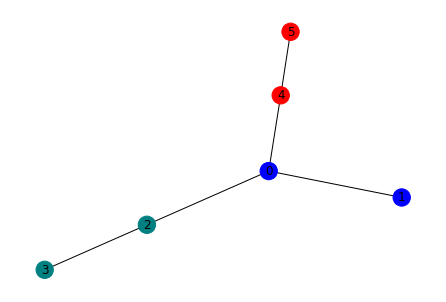

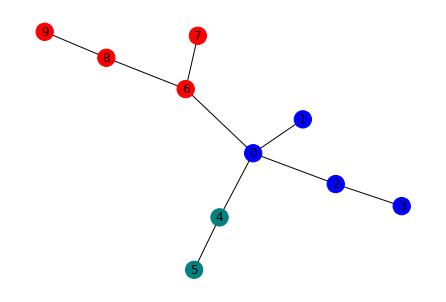

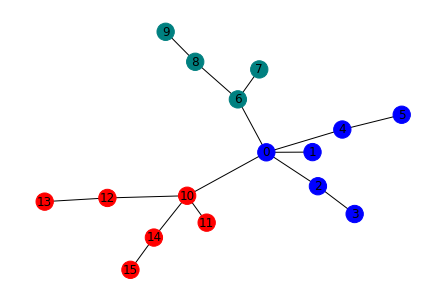

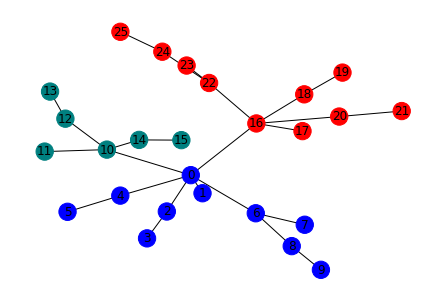

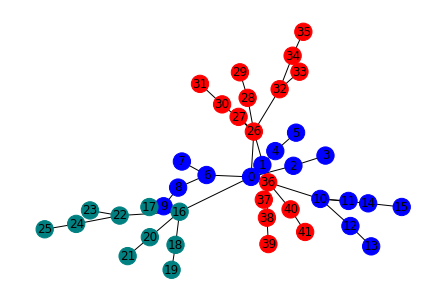

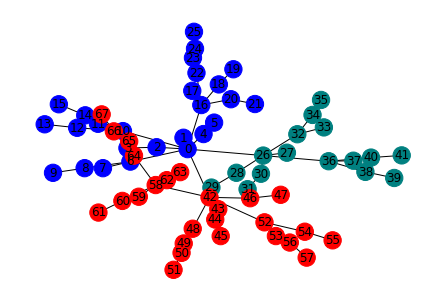

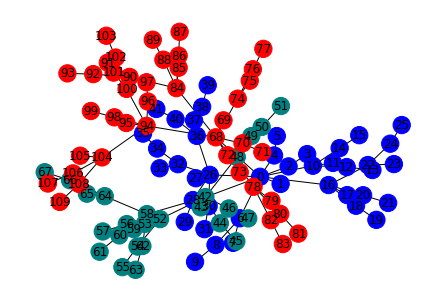

In [ ]:
n = 11 # Inserte un número aquí...

T = Treebonacci(n+1)

for i in range(min(11,n+1)):
 ti2 = 2*fib(i-2)
 ti1 = 2*fib(i-1) - ti2
 ti  = 2*fib(i) - ti1 - ti2
 color_map = ['blue']*ti2 + ['teal']*ti1 + ['red']*ti
 nx.draw(T[i], with_labels=True, node_color=color_map)
 plt.show()

In [ ]:
g = [Permutation(8,9),Permutation(2,5),Permutation(7,9)(8,10),Permutation(5,6)]

g = [Permutation(3,5)(4,6),Permutation(2,3),Permutation(2,4)(1,3),Permutation(1,2)]

g = [Permutation(1,2),Permutation(2,3)]

for i in range(2,16):
  perms = [(a,a + fibs(i)) for a in range(1,fibs(i-1)+1)]
  g.append(Permutation(perms))

for i in range(3,15):
  t0 = time()
  print(i,PermutationGroup(*g[:i]).order()==factorial(fibs(i)))
  print("Time taken:",time()-t0)

3 True
Time taken: 0.0006670951843261719
4 True
Time taken: 0.0011527538299560547
5 True
Time taken: 0.0058743953704833984
6 True
Time taken: 0.026505708694458008
7 True
Time taken: 0.1475834846496582
8 True
Time taken: 1.2784507274627686
9 True
Time taken: 11.159010171890259
10 True
Time taken: 106.31083106994629
11 True
Time taken: 1068.5647735595703


KeyboardInterrupt: ignored

In [22]:
A = [Permutation(6,7),Permutation(8,9),Permutation(7,8),Permutation(6,9)]
B = [Permutation(1,2),Permutation(2,3),Permutation(3,4),Permutation(4,5)]
C = A + B + [Permutation(2,9)(3,6)]
print(PermutationGroup(*A).order() == factorial(4))
print(PermutationGroup(*B).order() == factorial(5))
print(PermutationGroup(*C).order() == factorial(4+5),'\n\n')

A1 = [Permutation(6,7),Permutation(8,9),Permutation(7,8),Permutation(6,9)]
B1 = [Permutation(1,2),Permutation(2,3),Permutation(3,4),Permutation(4,5)]
C1 = A1 + B1 + [Permutation(2,9)(3,6)]
print(PermutationGroup(*A1).order() == factorial(5))
print(PermutationGroup(*B1).order() == factorial(9))
print(PermutationGroup(*C1).order() == factorial(5+9))

True
True
True
